# NMF Error Analysis

Let's take the data we generated and figure out the error estimates.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import smps
import joblib

sns.set("paper", "ticks", font_scale=1.2, palette="colorblind")
smps.set()

%matplotlib inline

## Load the data

In [2]:
df = pd.read_feather(
    Path().resolve().parent.joinpath("data/output/bootstrap/tata2017015.feather"))

df = df[["index", "variable", "value"]]

## Make the figure

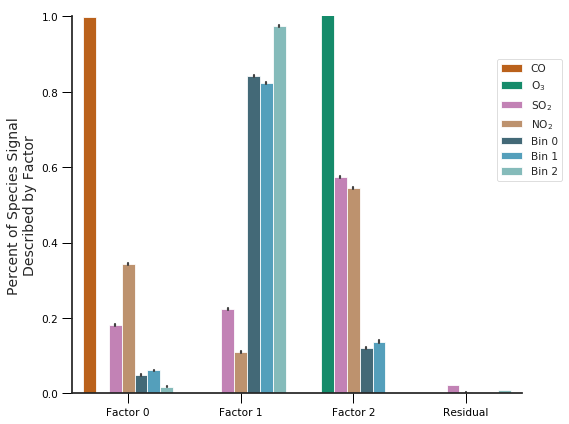

In [40]:
col_order = ["co", "o3", "so2", "no2", "bin0", "bin1", "bin2"]
colors = [sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[4], sns.color_palette()[5]] + sns.color_palette("GnBu_d", 3)

fig, ax = plt.subplots(1, figsize=(8, 6))

ax = sns.barplot(data=df, x="variable", y="value", hue="index", ax=ax, ci="sd", hue_order=col_order, palette=colors)

handles, _ = ax.get_legend_handles_labels()
labels = ["CO", "$O_3$", "$SO_2$", "$NO_2$", "Bin 0", "Bin 1", "Bin 2"]
ax.legend(handles, labels, bbox_to_anchor=(1.1, 0.9))
ax.set_ylabel("Percent of Species Signal\nDescribed by Factor", fontsize=14)
ax.set_xlabel("")

ax.set_ylim(0, 1)

sns.despine()
plt.tight_layout()

fig.savefig("SN015-comp-with-err.png", dpi=350)